In [1]:
import sys

!{sys.executable} -m pip install plotnine


In [2]:
!{sys.executable} -m pip install plotly.express

In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

#oryginalne dane
exercise=pd.read_csv("exercise.csv", header=0)
#podzielenie
exercise40=exercise.head(40)
rest = exercise[40:60]
print(exercise40)
print(rest)

        y    x1     x2
0   15.68  6.87  14.09
1    6.18  4.40   4.35
2   18.10  0.43  18.09
3    9.07  2.73   8.65
4   17.97  3.25  17.68
5   10.04  5.30   8.53
6   20.74  7.08  19.50
7    9.76  9.73   0.72
8    8.23  4.51   6.88
9    6.52  6.40   1.26
10  15.69  5.72  14.62
11  15.51  6.28  14.18
12  20.61  6.14  19.68
13  19.58  8.26  17.75
14   9.72  9.41   2.44
15  16.36  2.88  16.10
16  18.30  5.74  17.37
17  13.26  0.45  13.25
18  12.10  3.74  11.51
19  18.15  5.03  17.44
20  16.80  9.67  13.74
21  16.55  3.62  16.15
22  18.79  2.54  18.62
23  15.68  9.15  12.74
24   4.08  0.69   4.02
25  15.45  7.97  13.24
26  13.44  2.49  13.21
27  20.86  9.81  18.41
28  16.05  7.56  14.16
29   6.00  0.98   5.92
30   3.29  0.65   3.22
31   9.41  9.00   2.74
32  10.76  7.83   7.39
33   5.98  0.26   5.97
34  19.23  3.64  18.89
35  15.67  9.28  12.63
36   7.04  5.66   4.18
37  21.63  9.71  19.32
38  17.84  9.36  15.19
39   7.49  0.88   7.43
     y    x1     x2
40 NaN  9.87  10.43
41 NaN  9.99  15.

In [2]:
X = exercise40[['x1','x2']]
Y = exercise40['y']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
wyn = results.predict(X)

print(results.summary())
#całkiem nieźle przewiduje porównując do danych właściwych z In 3
print(wyn)

C:\Users\Radek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        20:36:47   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3151      0.388      3.392      0.0

In [16]:
const_wsp = 1.3151
x1_wsp = 0.5148
x2_wsp = 0.8069

X1 = rest['x1']
X2 = rest['x2']

for row in rest:
    Y = (const_wsp) + (x1_wsp)*X1 + (x2_wsp)*X2
    
print(Y)

40    14.812143
41    19.142420
42     5.916687
43    10.530219
44    19.012042
45    13.398546
46     4.829030
47     9.145561
48     5.892356
49    12.338338
50    18.908109
51    16.064268
52     8.962916
53    14.972426
54     5.859604
55     7.374722
56     4.535159
57    15.132925
58     9.100680
59    16.084528
dtype: float64


In [18]:
XX = rest[['x1','x2']]
YY = rest['y']
XX = sm.add_constant(XX)
results = sm.OLS(YY, XX).fit()
wynn = results.predict(XX)

print(results.summary())
#takie same wyniki przewidywania
print(wynn)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.966e+30
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.03e-254
Time:                        20:54:28   Log-Likelihood:                 627.18
No. Observations:                  20   AIC:                            -1248.
Df Residuals:                      17   BIC:                            -1245.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3151   3.48e-15   3.78e+14      0.0

In [11]:
#złożona cała tabela
exercise['y'][40:60] = Y
print(exercise)

            y    x1     x2
0   15.680000  6.87  14.09
1    6.180000  4.40   4.35
2   18.100000  0.43  18.09
3    9.070000  2.73   8.65
4   17.970000  3.25  17.68
5   10.040000  5.30   8.53
6   20.740000  7.08  19.50
7    9.760000  9.73   0.72
8    8.230000  4.51   6.88
9    6.520000  6.40   1.26
10  15.690000  5.72  14.62
11  15.510000  6.28  14.18
12  20.610000  6.14  19.68
13  19.580000  8.26  17.75
14   9.720000  9.41   2.44
15  16.360000  2.88  16.10
16  18.300000  5.74  17.37
17  13.260000  0.45  13.25
18  12.100000  3.74  11.51
19  18.150000  5.03  17.44
20  16.800000  9.67  13.74
21  16.550000  3.62  16.15
22  18.790000  2.54  18.62
23  15.680000  9.15  12.74
24   4.080000  0.69   4.02
25  15.450000  7.97  13.24
26  13.440000  2.49  13.21
27  20.860000  9.81  18.41
28  16.050000  7.56  14.16
29   6.000000  0.98   5.92
30   3.290000  0.65   3.22
31   9.410000  9.00   2.74
32  10.760000  7.83   7.39
33   5.980000  0.26   5.97
34  19.230000  3.64  18.89
35  15.670000  9.28  12.63
3

In [12]:
import plotly.express as px

#zobrazowane dane z przewidywanymi
fig = px.scatter(exercise, x="x1", y="y",height=400, title="y")
fig.show()

fig = px.scatter(exercise, x="x2", y="y",height=400, title="y")
fig.show()

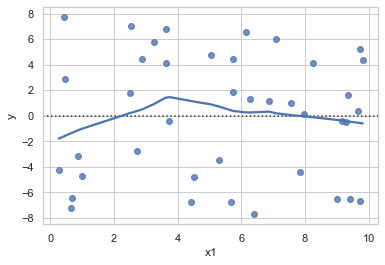

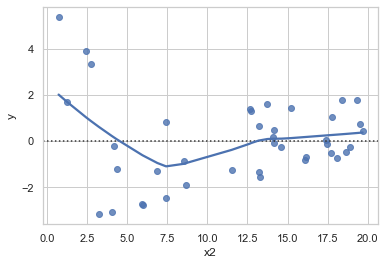

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

sns.residplot(exercise40['x1'], exercise40['y'], lowess=True)
plt.show()

sns.residplot(exercise40['x2'], exercise40['y'], lowess=True)
plt.show()

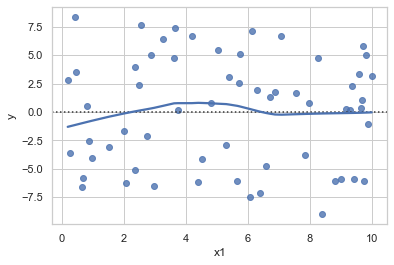

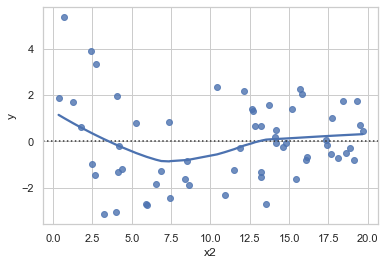

In [15]:
sns.set(style="whitegrid")

#wykres sresidułów dla całych danych
sns.residplot(exercise['x1'], exercise['y'], lowess=True)
plt.show()

sns.residplot(exercise['x2'], exercise['y'], lowess=True)
plt.show()